# Implementing K Nearest Neighbors in Flower Identification

In the following journal we explore prediction cases for flower identification using a K nearest Neighbors classifier with a feature space of sepal-length, sepal-width, petal-length and petal-width. The data was provided from UCI databases.

### Importing initial packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Data

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url,names = names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Selecting the features

In [23]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

### Preparing the Data for testing and training

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

### Normalize the data

In [25]:
from sklearn .preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Initialize the K Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier as KNC
classifier = KNC(n_neighbors = )
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

### Determining the precision of the Algorithim
We follow the test by determining the common evaluation methods of precision and F1-score.

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

    avg / total       1.00      1.00      1.00        30



### Model Evaluation
next we are going to evaluate what the best K is and try to fit the model a bit better for our data.

In [35]:
error = []
for i in range(1,40):
    knn = KNC(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

after attaining the precision of the model based off of K in the range of 1 to 40 we plot them to see which fit works best. 

Text(0,0.5,'Mean Error')

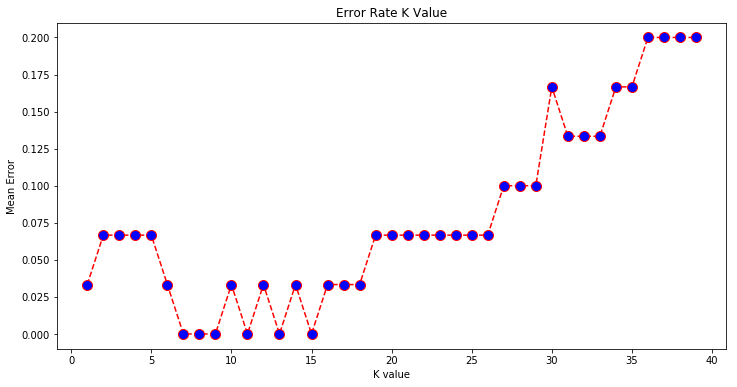

In [36]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed', marker= 'o',
        markerfacecolor='blue', markersize= 10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

Here we can see that we changed the number of K neighbors form 5 to 7 to accomodate the least mean error and applied it. 